In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import mountains
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mountain_detail, routes, weather_data = mountains.call_data()

In [75]:
def to_mountainrte(rte):
    route = []
    for key,value in rte.items():
        for v in value:
            route.append([key] + list(v))
    return pd.DataFrame(route)

def to_mountainwea(wea):
    weather = []
    for key,value in wea.items():
        for v in value:
            weather.append([key] + list(v))
    return pd.DataFrame(weather)


In [114]:
fin_routes = to_mountainrte(routes)
fin_routes.columns = ['Mountain','Route','Class',
                     'Snow','ElevationGain','RTMileage']
fin_routes[["ElevationGain","RTMileage"]] = fin_routes[["ElevationGain","RTMileage"]].apply(pd.to_numeric)

In [77]:
fin_weather = to_mountainwea(weather_data)
fin_weather.columns = ['Mountain','Date','Temp',
                     'WindLow','WindHigh','Description']
fin_weather[["Temp","WindLow","WindLow","WindHigh"]] =\
fin_weather[["Temp","WindLow","WindLow","WindHigh"]].apply(pd.to_numeric)

In [115]:

fin_mountain = pd.DataFrame.from_dict(mountain_detail).T
fin_mountain.index.name = 'Mountain'
fin_mountain.columns = ['Elevation','Rank',
                     'Range']
fin_mountain.reset_index(level=0, inplace=True)

In [116]:
# How many mountains are in each class 
# Is gain related to class
routes_class = fin_routes.groupby('Class').agg({'ElevationGain': \
    ['min', 'max','median','mean','std'],'RTMileage': ['min', 'max','median','mean','std'], 'Mountain':['nunique']})

In [247]:
# What is the longest/shortest/avg route
routes_insight = fin_routes.groupby('Route').agg({'ElevationGain': ['min', 'max'],'RTMileage': ['min', 'max'],\
                                                  'Mountain':['nunique']})
mountain_route_insight = fin_routes.groupby('Mountain').agg({'ElevationGain': ['min', 'max'],'RTMileage': ['min', 'max']})

In [117]:
# How many mountains still have snowpack - and what class are they
snow_routes = pd.DataFrame(fin_routes[fin_routes.Snow != ' '])

In [120]:
# Which range is the easiest to knock out (lowest avg elevation gain)
elevation = fin_routes.groupby('Mountain') \
.agg({'ElevationGain': ['min', 'max','median','mean','std','sum'], 'Route': ['count']}).round(2)

In [220]:
range_weather = fin_mountain.merge(fin_weather,left_on='Mountain',right_on='Mountain')
agg_weather = fin_weather.groupby('Date').agg({'Temp': ['min', 'max','median','mean','std'], \
                                               'WindHigh': ['min', 'max','median','mean','std']})
range_weather[["Temp","WindLow","WindLow","WindHigh","Rank","Elevation"]] = range_weather[["Temp",\
                "WindLow","WindLow","WindHigh","Rank","Elevation"]].apply(pd.to_numeric)

range_weather_insights =range_weather.groupby('Range').agg({'Elevation':['min', 'max','median','mean','std'], \
            'Rank':['min', 'max','median','mean','std'],'Temp':['min', 'max','median','mean','std'],\
                                    'WindHigh':['min', 'max','median','mean','std'],'Mountain':['nunique']})

[Text(0, 0.5, 'Median Elevation Gain')]

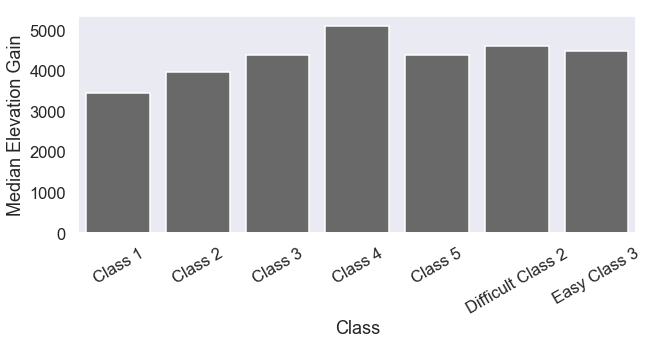

In [343]:
import seaborn as sns
import matplotlib
plt.rcParams['figure.figsize']=(10,4)
sns.set_style("dark")
sns.set_context("talk", font_scale=1)
z = sns.barplot(x=routes_class.index, y="median", data=routes_class['ElevationGain'],color="dimgray")
z.set_xticklabels(routes_class.index,rotation=30)
z.set(ylabel='Median Elevation Gain')

In [240]:
routes_class

ElevationGain                                         \
                            min   max median         mean          std   
Class                                                                    
Class 1                    2500  7600   3450  3916.666667  1528.070679   
Class 2                    2000  5800   3980  3883.220339  1041.365881   
Class 3                    1500  6100   4400  4197.222222  1383.471020   
Class 4                    3200  6200   5100  4963.444444   905.837611   
Class 5                    4400  4400   4400  4400.000000          NaN   
Difficult Class 2          2150  6500   4600  4640.294118  1125.003431   
Easy Class 3               2900  6250   4500  4537.500000  1593.410912   

                  RTMileage                                     Mountain  
                        min    max  median       mean       std  nunique  
Class                                                                     
Class 1                5.75  24.00   9.500  10.805556  5.478335        7  
Class 2                3.25  17.00   8.400   8.803390  3.157720       22  
Class 3                2.00  22.00  12.000  10.513889  4.600444       17  
Class 4                5.00  17.00  11.400  11.766667  4.422881        6  
Class 5               11.25  11.25  11.250  11.250000       NaN        1  
Difficult Class 2      2.00  17.00  13.000  11.514706  4.531548       13  
Easy Class 3           6.00  14.50   9.925  10.087500  3.734607        4

[Text(0.5, 0, 'Median Round Trip Mileage')]

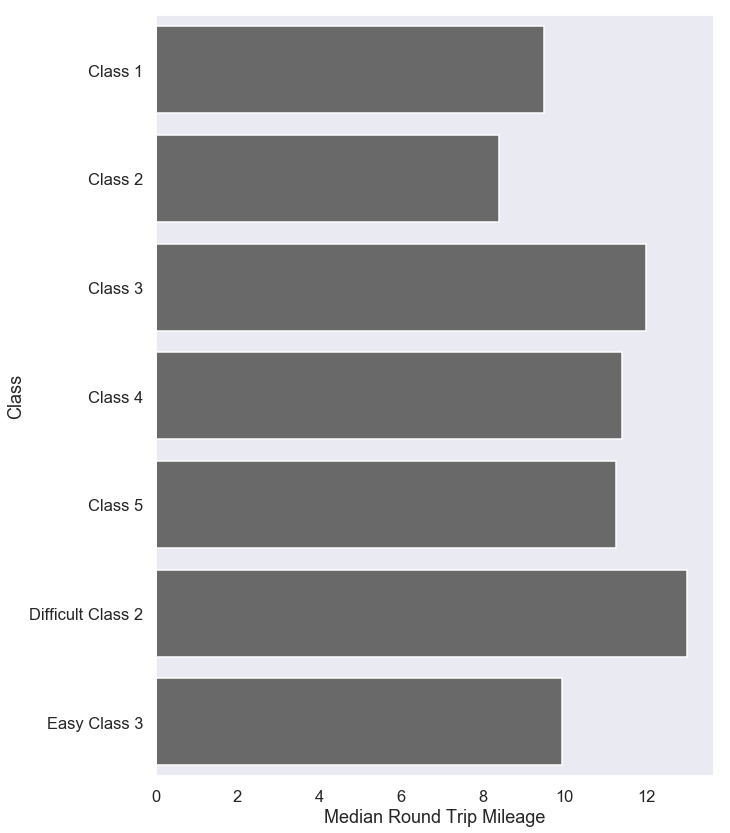

In [331]:
plt.rcParams['figure.figsize']=(10,14)
z = sns.barplot(y=routes_class.index, x="median", data=routes_class['RTMileage'],color='dimgray')
#z.set_xticklabels(routes_class.index,rotation=30)
z.set(xlabel='Median Round Trip Mileage')

In [324]:
mri_elevation = mountain_route_insight['ElevationGain'].sort_values(by='max',ascending=False)[:10]
mri_mileage = mountain_route_insight['RTMileage'].sort_values(by='max',ascending=False)[:10]

<bound method DataFrame.max of                          min   max
Mountain                          
Pikes Peak             14.00  24.0
Snowmass Mountain       9.00  22.0
Capitol Peak           17.00  17.0
North Eolus            16.75  17.0
Mt. Bierstadt           2.00  17.0
Ellingwood Point       11.60  17.0
Mt. Antero             16.00  16.0
Longs Peak             13.00  16.0
El Diente Peak          5.00  16.0
Mt. of the Holy Cross  12.00  15.0>

[Text(0, 0.5, 'Longest Round Trip Mileage'),
 Text(0.5, 0, 'Longest Route (Miles)')]

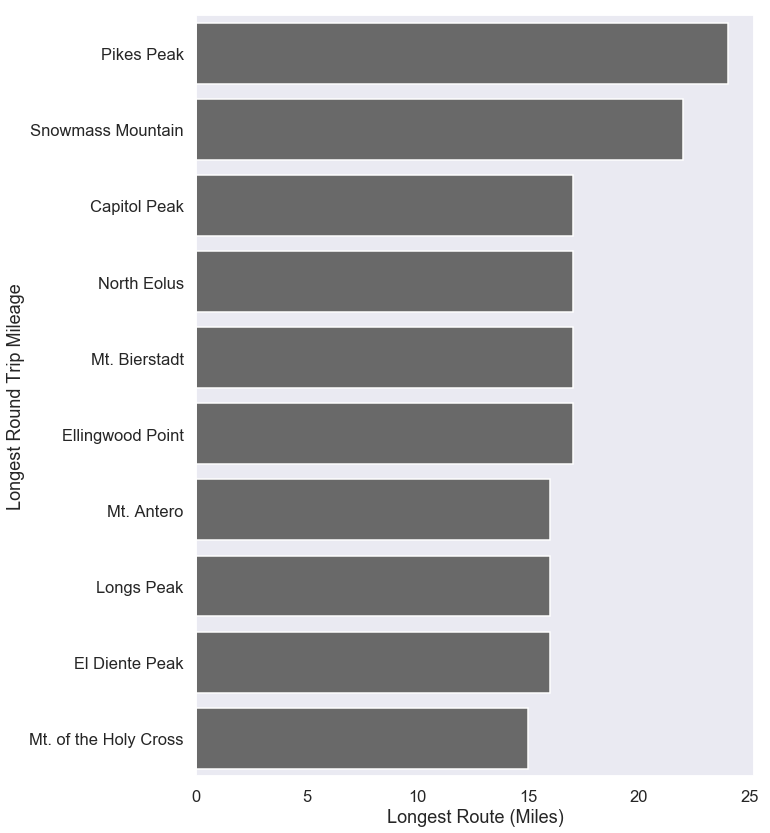

In [328]:
plt.rcParams['figure.figsize']=(10,14)
z = sns.barplot(x="max", y=mri_mileage.index, \
                data=mri_mileage,color='dimgray')
z.set(ylabel='Longest Round Trip Mileage', xlabel="Longest Route (Miles)")

In [335]:
elevation

ElevationGain                                        \
                                min   max median     mean      std    sum   
Mountain                                                                    
Capitol Peak                   5300  5300   5300  5300.00      NaN   5300   
Challenger Point               5315  6250   5450  5627.50   368.56  33765   
Conundrum Peak                 4400  4600   4600  4520.00   109.54  22600   
Culebra Peak                   2700  2700   2700  2700.00      NaN   2700   
El Diente Peak                 3200  5100   4400  4385.71   696.25  30700   
Ellingwood Point               2200  6500   6200  5320.00  1782.41  26600   
Handies Peak                   2500  3650   2800  2983.33   596.52   8950   
Humboldt Peak                  4200  5700   4400  4733.33   643.95  28400   
Huron Peak                     3500  3980   3600  3693.33   253.25  11080   
La Plata Peak                  3380  5900   4700  4670.00  1042.24  18680   
Longs Peak                     5100  5900   5300  5433.33   416.33  16300   
Maroon Peak                    4500  4800   4528  4589.00   143.12  18356   
Missouri Mountain              4250  5800   4500  4675.00   560.13  28050   
Mt. Antero                     5200  5200   5200  5200.00      NaN   5200   
Mt. Bierstadt                  1500  5600   2425  2650.00  1369.83  21200   
Mt. Columbia                   4250  4800   4600  4610.00   224.72  23050   
Mt. Democrat                   2150  3400   2600  2631.82   413.69  28950   
Mt. Elbert                     4100  5300   4425  4562.50   561.81  18250   
Mt. Lindsey                    3500  3900   3500  3633.33   230.94  10900   
Mt. Massive                    3950  4800   4500  4416.67   431.08  13250   
Mt. Princeton                  3200  3200   3200  3200.00      NaN   3200   
Mt. Sherman                    2100  3100   2150  2450.00   563.47   7350   
Mt. Sneffels                   2900  2950   2925  2925.00    35.36   5850   
Mt. Yale                       4300  5000   4650  4650.00   494.97   9300   
Mt. of the Holy Cross          5210  5600   5600  5470.00   225.17  16410   
North Eolus                    6000  6100   6000  6025.00    50.00  24100   
Pikes Peak                     4300  7600   5950  5950.00  2333.45  11900   
Quandary Peak                  2575  3450   2950  2981.25   434.63  11925   
San Luis Peak                  3400  3600   3500  3500.00   141.42   7000   
Snowmass Mountain              4500  5800   5150  5150.00   919.24  10300   
Sunshine Peak                  3700  4800   4200  4225.00   556.03  16900   
Tabeguache Peak                4000  5600   4600  4700.00   663.32  18800   
Torreys Peak                   3000  5500   3175  3665.00   884.45  36650   
Uncompahgre Peak               3000  3000   3000  3000.00      NaN   3000   
Wetterhorn Peak                3300  3300   3300  3300.00     0.00   6600   

                      Route  
                      count  
Mountain                     
Capitol Peak              1  
Challenger Point          6  
Conundrum Peak            5  
Culebra Peak              1  
El Diente Peak            7  
Ellingwood Point          5  
Handies Peak              3  
Humboldt Peak             6  
Huron Peak                3  
La Plata Peak             4  
Longs Peak                3  
Maroon Peak               4  
Missouri Mountain         6  
Mt. Antero                1  
Mt. Bierstadt             8  
Mt. Columbia              5  
Mt. Democrat             11  
Mt. Elbert                4  
Mt. Lindsey               3  
Mt. Massive               3  
Mt. Princeton             1  
Mt. Sherman               3  
Mt. Sneffels              2  
Mt. Yale                  2  
Mt. of the Holy Cross     3  
North Eolus               4  
Pikes Peak                2  
Quandary Peak             4  
San Luis Peak             2  
Snowmass Mountain         2  
Sunshine Peak             4  
Tabeguache Peak           4  
Torreys Peak             10  
Uncompahgre Pea

In [ ]:
z = sns.barplot(x=routes_class.index, y="median",hue = "median", data=routes_class['ElevationGain'],palette="Blues_d")
z.set_xticklabels(routes_class.index,rotation=30)
z.set(ylabel='Median Elevation Gain')

In [ ]:
#elevation
    #elevation.ElevationGain.sort_values(by='min')
    #elevation.ElevationGain.sort_values(by='max')
    #elevation.ElevationGain.sort_values(by='median')
#agg_weather
    #agg_weather['Temp']
    #agg_weather['WindHigh']
#range_weather_insights
#fin_mountain
#fin_routes
#fin_weather